In [2]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
train_labels.shape

(404,)

In [6]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [7]:
train_labels[0]

15.2

## Normalizacion

In [8]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [9]:
def build_model_regression(lr_var, input_data):
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizers.RMSprop(learning_rate=lr_var), loss='mse', metrics= ['mae'])
  return model

## K-Fold Cross Validation

In [10]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 85
all_history = []

In [11]:
valor = 2
(valor) * num_val_samples

202

In [12]:
for i in range(k):
  print('Fold:',i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_labels[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate(
    [train_labels[: i * num_val_samples],
      train_labels[(i+1)* num_val_samples :]], axis=0)
  model = build_model_regression(0.001, 13)
  history = model.fit(partial_train_data, partial_train_targets,
                      epochs= num_epoch,
                      batch_size = 16,
                      validation_data=(val_data, val_targets),
                      verbose=0)
  all_history.append(history.history['val_mae'])

Fold: 0
Fold: 1
Fold: 2
Fold: 3


In [47]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [48]:
all_mae_avg

0     19.255430
1     15.807756
2     11.825499
3      8.203103
4      6.051025
        ...    
80     2.433486
81     2.362048
82     2.394776
83     2.376988
84     2.410507
Length: 85, dtype: float64

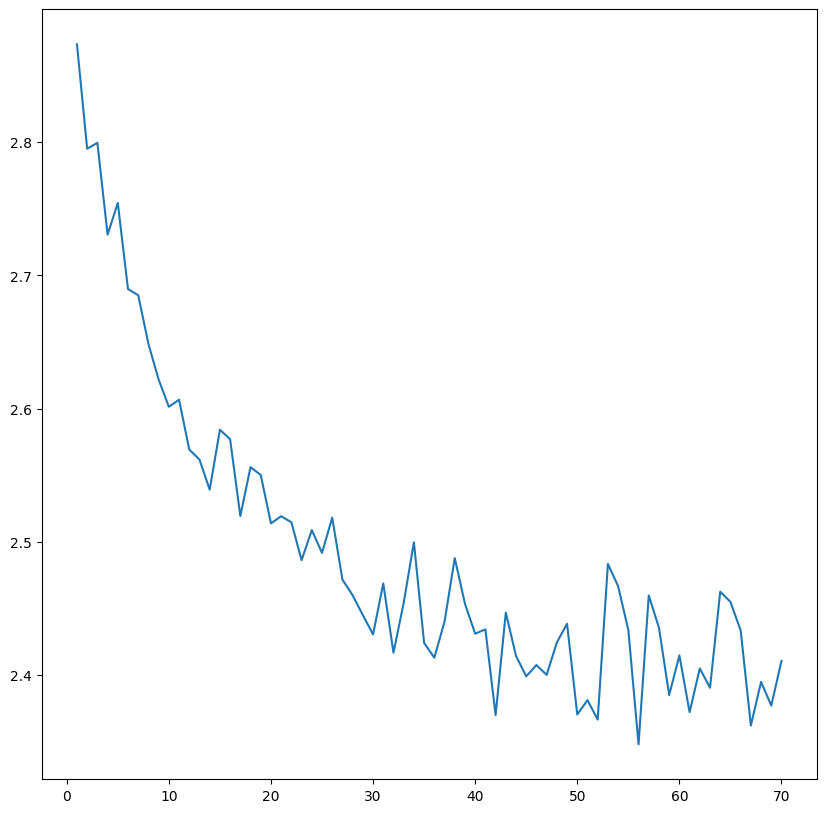

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [50]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 21.4867 - mae: 2.8137


[21.486724853515625, 2.8136842250823975]

# Otra forma de hacer con Keras y sklearn

In [52]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.12.0 which is incompatible.


In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_validate

In [18]:
def funcion():
  model1=models.Sequential()
  model1.add(layers.Dense(64,input_dim=13,activation='relu'))
  model1.add(layers.Dense(64, activation='relu'))
  model1.add(layers.Dense(32, activation='relu'))
  model1.add(layers.Dense(16, activation='relu'))
  model1.add(layers.Dense(1))
  model1.compile(optimizer='adam',loss='mse',metrics='mae')
  return model1

In [14]:
x1 = pd.DataFrame(train_data)
x2 = pd.DataFrame(test_data)

X1=pd.concat([x1,x2],axis=0)

y1=pd.DataFrame(train_labels)
y2=pd.DataFrame(test_labels)

Y1=pd.concat([y1,y2],axis=0)

## Normalizacion con StandarScaler de sklearn

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
m=ss.fit_transform(X1)
X=pd.DataFrame(m)

n=ss.fit_transform(Y1)
y=pd.DataFrame(n)

In [20]:
prob_keras = KerasRegressor(build_fn=funcion,epochs=5,batch_size=16)

<ipython-input-20-1034c6a02c4d>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  prob_keras = KerasRegressor(build_fn=funcion,epochs=5,batch_size=16)


In [21]:
cross=cross_validate(prob_keras,X,y,cv=9,verbose=2,return_train_score=True,scoring='r2')

Epoch 1/5
29/29 [==============================] - 1s 3ms/step - loss: 0.7597 - mae: 0.5841
Epoch 2/5
29/29 [==============================] - 0s 3ms/step - loss: 0.3671 - mae: 0.4223
Epoch 3/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2123 - mae: 0.3159
Epoch 4/5
29/29 [==============================] - 0s 3ms/step - loss: 0.1679 - mae: 0.2727
Epoch 5/5
29/29 [==============================] - 0s 2ms/step
[CV] END .................................................... total time=   2.1s
Epoch 1/5
29/29 [==============================] - 2s 5ms/step - loss: 0.5940 - mae: 0.5414
Epoch 2/5
29/29 [==============================] - 0s 5ms/step - loss: 0.2948 - mae: 0.3519
Epoch 3/5
29/29 [==============================] - 0s 4ms/step - loss: 0.2204 - mae: 0.3083
Epoch 4/5
29/29 [==============================] - 0s 4ms/step - loss: 0.1782 - mae: 0.2768
Epoch 5/5
29/29 [==============================] - 0s 3ms/step
[CV] END ................................................

In [22]:
pd.DataFrame(cross).mean()

fit_time       2.276823
score_time     0.300331
test_score     0.824906
train_score    0.876889
dtype: float64

In [6]:
what_functions = ['Problem_type','Last-layer_activation','Loss_function']
data = [['Binary classification','sigmoid','binary_crossentropy'],
 ['Multiclass, single label classification','softmax','categorical_crossentropy'],
  ['Multiclass, multilabel classification','sigmoid','binary_crossentropy'],
   ['Reglression or arbitrary values','None','mse'],
    ['Regression to values between 0 and 1','sigmoid','mse or binary_crossentropy']]
pd.DataFrame(data, columns=what_functions)

,Problem_type,Last-layer_activation,Loss_function
0,Binary classification,sigmoid,binary_crossentropy
1,"Multiclass, single label classification",softmax,categorical_crossentropy
2,"Multiclass, multilabel classification",sigmoid,binary_crossentropy
3,Reglression or arbitrary values,None,mse
4,Regression to values between 0 and 1,sigmoid,mse or binary_crossentropy
